# Day 10

This notebook is designed to cover some of the requests from [this](https://piazza.com/class/iju1ffuooio7mp?cid=28) Piazza post.

High-level contents of this notebook:
1.  Visualizing models
2.  Determining when to use a particular model
3.  Interpreting log-loss error metric

## Loading the Data

We will be using both the Rotten Tomatoes and the SF Crime datasets as running examples.  This notebook assumes that you have downloaded the data for these contests from Kaggle and stored them in the directories indicated below.

In [2]:
import pandas as pd

tomatoes = pd.read_csv('../../datasets/rotten_tomatoes_train.tsv', sep='\t')
crime = pd.read_csv('../../../CYOA/train.csv')

In [3]:
tomatoes.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## Model Visualization

After you fit a model, you can compute the accuracy of your model by using the `model.score` function.  This will give you back a single number that indicates the quality of the model.  However, this in and of itself may not be terribly useful.

Suppose, you tried a new model and the performance went up.  What phenomena in the data might be driving this change in performance?  Suppose, you actually want to use the machine learning model as a way to gain greater insight into the data.  How can you inspect the model to better understand the relationships between the variables within?

This brings us to the topic of model visualization (also called model introspection).  In the next two sections we will be doing model visualization for two types of models: logistic regression models and decision tree models.

For this section we will use the Rotten Tomatoes dataset.  The specific encoding of text to features that we will be using is [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).  You will recall that we built our own TF-IDF vectorizer in class last week.  Here, we will be using the vectorizer built into scikit learn.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(tomatoes.Phrase)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

To better understand what we just did let's take a look at the list of features names for this vectorizer.  These feature names are a list that shows us which column in the TF-IDF output corresponds to which word.  To avoid producing too much output, let's just look at a subset.

In [6]:
vectorizer.get_feature_names()[1000:1020]

[u'authority',
 u'autistic',
 u'auto',
 u'autobiographical',
 u'autocritique',
 u'automatic',
 u'automatically',
 u'autopilot',
 u'autopsy',
 u'available',
 u'avalanche',
 u'avalanches',
 u'avant',
 u'avarice',
 u'avary',
 u'avengers',
 u'avenues',
 u'average',
 u'averse',
 u'aversion']

### Visualizing a Logistic Regression Model

Next, we transform the individual phrases using our vectorizer, create a train test split, and fit a logistic regression model.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X = vectorizer.transform(tomatoes.Phrase)
y = tomatoes.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.62336280917595799

Next, we'll visualize the learned model using a wordcloud.  First, install the wordcloud generator using pip install.

`pip install wordcloud`

Typically, a word cloud shows words scaled by their frequency in a document.  Here, we will be using the weights learned by our logistic regression model to scale the size of the words.  You can understand these visuals to make words larger if they have a *greater positive contribution to predicting a particular sentiment value*.

Before we do this, let's take a look at our logistic regression model in more detail so we can understand more what's going on under the hood.

In [8]:
print "coefficients", model.coef_
print "coefficients.shape", model.coef_.shape
print "intercepts", model.intercept_
print "intercepts.shape", model.intercept_.shape

coefficients [[ 0.31075238  0.5359686  -0.50775881 ..., -0.04004379 -0.04113721  0.        ]
 [-0.36208935  0.44456992  0.02042782 ..., -0.16545889 -0.09626213  0.        ]
 [ 0.3740686  -0.34128828  0.39242386 ...,  0.23772723  0.09523566  0.        ]
 [-0.15588274 -0.4037369   0.68916175 ...,  0.05096342  0.07768249  0.        ]
 [-0.1668489  -0.23551334 -0.59425462 ..., -0.08318797 -0.03551881  0.        ]]
coefficients.shape (5, 15240)
intercepts [-1.68177617  0.25670798  2.60782407  0.44465542 -1.6274113 ]
intercepts.shape (5,)


In [9]:
import math
import numpy as np

print "model probs", model.predict_proba(X_test[0,:])
linear = model.coef_.dot(X_test[0,:].todense().T) + model.intercept_[:,np.newaxis]
print "calculated probs", np.exp(linear) / np.sum(np.exp(linear))

model probs [[ 0.01927359  0.10015886  0.69842747  0.1544791   0.02766099]]
calculated probs [[ 0.01927359]
 [ 0.10015886]
 [ 0.69842747]
 [ 0.1544791 ]
 [ 0.02766099]]


Now that we've built up some intuition for `model.coef_`, let's visualize these coefficients using a wordcloud!

In [10]:
import wordcloud

def make_word_cloud(feature_names, coefficients):
    """ Create a word cloud with the words given by feature_names
        and given coefficients. """
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(zip(feature_names, coefficients))
    return cloud.to_image()

In [23]:
# Word cloud for sentiment value 0 (worst possible)
make_word_cloud(vectorizer.get_feature_names(), model.coef_[0,:]).show()

In [14]:
# Word cloud for sentiment value 1
make_word_cloud(vectorizer.get_feature_names(), model.coef_[1,:])

<PIL.Image.Image image mode=RGB size=400x200 at 0x95CA320>

In [ ]:
# Word cloud for sentiment value 2
make_word_cloud(vectorizer.get_feature_names(), model.coef_[2,:])

In [ ]:
# Word cloud for sentiment value 3
make_word_cloud(vectorizer.get_feature_names(), model.coef_[3,:])

In [ ]:
# Word cloud for sentiment value 4 (best possible)
make_word_cloud(vectorizer.get_feature_names(), model.coef_[4,:])

### Visualizing a Logistic Regression Model for SF Crime

Next, we'll do a quick spin through the SF Crime dataset to see another example of visualizing a learned model.

In [25]:
from sklearn.metrics import log_loss

X_crime = pd.get_dummies(crime.DayOfWeek)
y_crime = crime.Category

X_crime_train, X_crime_test, y_crime_train, y_crime_test = \
    train_test_split(X_crime, y_crime, train_size=.05)
model_crime = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model_crime.fit(X_crime_train, y_crime_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


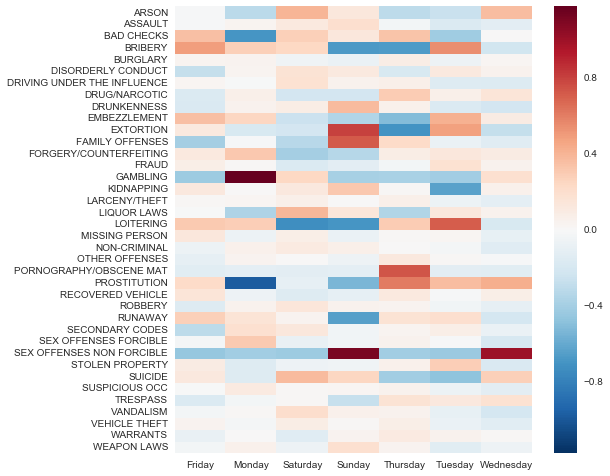

In [26]:
from sklearn.metrics import log_loss
import seaborn as sbs

sbs.plt.figure(figsize=(8,8))
model_crime.classes_
sbs.heatmap(model_crime.coef_,
            xticklabels=X_crime.columns,
            yticklabels=model_crime.classes_)

### Visualizing a Decision Tree

Next, we will build a decision tree and use it to visualize the data.  In order to make the visualization tractable, we will make the decision tree relatively small.  However, there are lots of folks that are thinking about how to visualize larger decision trees (even random forests which combine multiple decision trees).  One of these students is our own Michael Bocamazo.  He's on leave doing an LOA, but maybe he'll be willing to provide suggestions down the line.

In [27]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

The easiest way to visualize a decision tree is to simply visualize the individual nodes in the tree graphically.  For small trees this exhaustive approach can work.  We will use the popular library graphviz to do this visualization.  Sklearn has a built in converter from the DecisionTree class to a graphviz dot file.  We will then use some ipython magic to render the graph in our notebook.

In [28]:
export_graphviz(tree_model, feature_names=vectorizer.get_feature_names(), out_file='tree.dot')

In [29]:
%install_ext https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py
%load_ext gvmagic

Installed gvmagic.py. To use it, type:
  %load_ext gvmagic


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


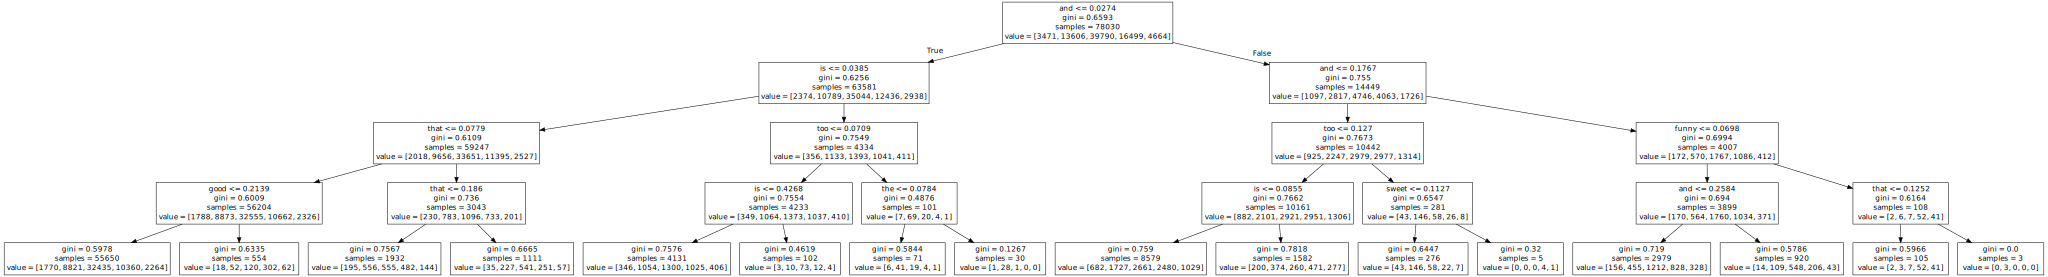

In [30]:
f = open('tree.dot')
tree_model_visualization = f.read()
f.close()
%dotstr tree_model_visualization

In [31]:
tree_model.score(X_test, y_test)

0.51514801999231064

If we look at the first node we are essentially using and as a proxy for a long phrase.  Long phrases are more likely to have polarized sentiment values.  Instead of making the algorithm do the work using TF-IDF, we can instead encode that feature directly.

In [32]:
from scipy import sparse

num_words_feature = np.asarray(map(lambda x: len(x.split()), tomatoes.Phrase))
num_words_feature = num_words_feature[:, np.newaxis]
X_with_num_words = sparse.hstack((X, num_words_feature))
print X_with_num_words.shape

(156060, 15241)


In [33]:
tree_model_with_num_words = DecisionTreeClassifier(max_depth=4)
tree_model_with_num_words.fit(X_with_num_words, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

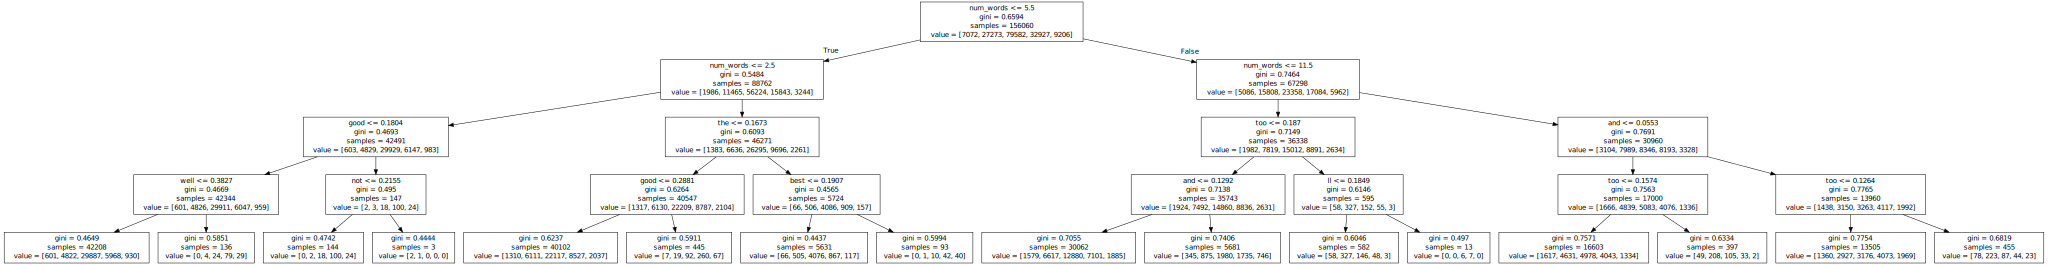

In [34]:
export_graphviz(tree_model_with_num_words,
                feature_names=vectorizer.get_feature_names() + ['num_words'],
                out_file='tree.dot')
f = open('tree.dot')
tree_model_visualization = f.read()
f.close()
%dotstr tree_model_visualization

This has been good to visualize what is going on with the decision tree, but let's see how well we can do if we don't limit the depth.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_with_num_words, y, train_size=0.5)
tree_model_with_num_words = DecisionTreeClassifier()
tree_model_with_num_words.fit(X_train, y_train)
tree_model_with_num_words.score(X_test, y_test)

0.53419197744457259

Let's see how good we can do with a Random Forest.

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_model_with_num_words = RandomForestClassifier()
forest_model_with_num_words.fit(X_train, y_train)
forest_model_with_num_words.score(X_test, y_test)

0.60303729334871203

Now that we've gained some insight that lead us to add a feature consisting of the number of words in the phrase, let's see if that boosts our score using logistic regression.

In [37]:
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)
print "With num words", model.score(X_test, y_test)

model_without_num_words = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model_without_num_words.fit(X_train[:,:-1], y_train)
print "Without num words", model_without_num_words.score(X_test[:,:-1], y_test)

With num words 0.631218762015
Without num words 0.62552864283


As a final step, let's tune the amount of regularization for our logistic regression model (since it seems to be working the best).

In [38]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(Cs=[math.e**v for v in range(-5,5)],
                             multi_class='multinomial',
                             solver='newton-cg')
model.fit(X_train, y_train)
print "With tuning", model.score(X_test, y_test)

With tuning 0.63916442394


/usr/local/lib/python2.7/dist-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/optimize.py:193: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


## When to Give Up on a Model?

Why are decision trees generally bad for sentiment analysis?  Let's plot the probability of some sentiment value versus the TF-IDF value for a particular word.  We'll deliberately pick a word that is likely to play an important role in determining the sentiment of a movie review.

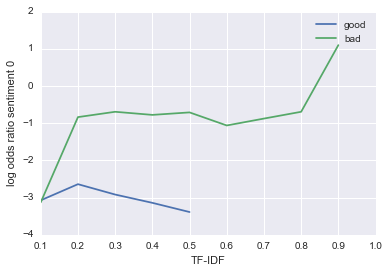

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

def make_log_odds_plot(word, sentiment):
    log_odds = []
    word_index = vectorizer.get_feature_names().index(word)
    word_tf_idf = np.asarray(X_train[:,word_index].todense())
    bucket_centers = np.arange(0, np.max(word_tf_idf), .1)
    bucket_indices = np.digitize(word_tf_idf, bucket_centers)

    for i, v in enumerate(bucket_centers):
        smoothed_prob = np.sum((y_train[:, np.newaxis] == sentiment) * (bucket_indices == i)) / float(sum(bucket_indices == i))
        log_odds.append(np.log(smoothed_prob / (1-smoothed_prob)))
    plt.plot(bucket_centers, log_odds)
    plt.ylabel('log odds ratio sentiment %d' % (sentiment,))
    plt.xlabel('TF-IDF')

make_log_odds_plot('good', 0)
make_log_odds_plot('bad', 0)
plt.legend(['good', 'bad'])
plt.show()

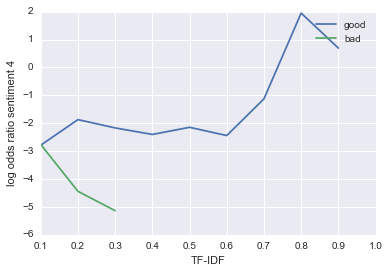

In [41]:
make_log_odds_plot('good', 4)
make_log_odds_plot('bad', 4)
plt.legend(['good', 'bad'])
plt.show()

From this analysis we see that the there is a strong relationship between the magnitude of a TF-IDF feature and the resultant probability of the phrase having a certain sentiment value.  Why might this be hard for a tree to model?

## Interpreting Log Loss

One complexity of the SF Crime data is that it uses a metric other than accuracy.  This metric is called log loss.  Next, we will take a closer look at that error metric and some issues that arise in interpreting it.

In [42]:
all_crimes = set(crime.Category)
crime_probabilities = {}
for c in all_crimes:
    crime_probabilities[c] = (crime.Category == c).sum() / float(len(crime.Category))

In [43]:
crime_probabilities

{'ARSON': 0.0017231384581042743,
 'ASSAULT': 0.087553200333922138,
 'BAD CHECKS': 0.00046238877329169559,
 'BRIBERY': 0.00032913880660418723,
 'BURGLARY': 0.041859850646148451,
 'DISORDERLY CONDUCT': 0.0049199987700003075,
 'DRIVING UNDER THE INFLUENCE': 0.0025829993542501616,
 'DRUG/NARCOTIC': 0.061466956855483007,
 'DRUNKENNESS': 0.0048744432258336383,
 'EMBEZZLEMENT': 0.0013279441124584162,
 'EXTORTION': 0.00029155548266668487,
 'FAMILY OFFENSES': 0.00055919430464586826,
 'FORGERY/COUNTERFEITING': 0.012082469201604922,
 'FRAUD': 0.01899552302889702,
 'GAMBLING': 0.00016627773620834374,
 'KIDNAPPING': 0.0026661382223543335,
 'LARCENY/THEFT': 0.19919161686876244,
 'LIQUOR LAWS': 0.002167305013729302,
 'LOITERING': 0.0013951385401042538,
 'MISSING PERSON': 0.02959857593368935,
 'NON-CRIMINAL': 0.10512397371900657,
 'OTHER OFFENSES': 0.14370724185096731,
 'PORNOGRAPHY/OBSCENE MAT': 2.5055549291668231e-05,
 'PROSTITUTION': 0.0085234423135838663,
 'RECOVERED VEHICLE': 0.003573832439875223

When evaluating a classifier according to log loss, we require the model to provide a probability of each possible outcome.  The model then incurs a loss proportional to the negative of the log of the probability the model assigned to that outcome.

As an example, suppose the TV weather person assigned a probability of 0.7 to it raining and 0.2 it snowing and 0.1 to neither.  It turned out it snowed.  What is the log loss for this prediction?

### A Sensible Baseline

When we did the titanic dataset, the easiest baseline model was to simply predict that everyone perished (since it was the most common outcome).  Similarly, here we could predict 'OTHER-OFFENSES' for every data point.  However, we must do more than simply predict a single outcome, we must output a probability for each of the possible crimes.  The first thing to try is to output a probability of 1 for 'OTHER-OFFENSES' and 0 for all other crimes.  What will go wrong here?  Note: Kaggle saves you from this without really telling you that it is doing so.

To improve upon this approach, we can simply predict the probabilities observed in the entire dataset for each individual datapoint.

In [ ]:
def baseline(x):
    """ the baseline model ignores x and simply predicts the baseline probabilities
        in the dataset """
    return crime_probabilities

# this is super slow, and not recommended, but I wanted to illustrate the point clearly
log_loss = 0.0
for row in crime.iterrows():
    # let's just use the X and Y position
    features = np.asarray([row[1].X, row[1].Y])
    probs = baseline(features)
    log_loss += -np.log(probs[row[1].Category]) / float(len(crime))
    if row[0] % 50000 == 0:
        print row[0]/ float(len(crime))

print "log_loss", log_loss

This is horribly slow, and we can really do a lot better.  You'll notice that we always add the same value for log_loss for a particular category.  To speed things up we can loop over crime categories and use counts to speed things up.

In [44]:
log_loss = 0.0
for category in all_crimes:
    # baseline ignores x, so we just pass in None
    probs = baseline(None)
    log_loss += -np.log(probs[category])*(crime.Category == category).sum() / float(len(crime))

print "log_loss", log_loss

NameError: name 'baseline' is not defined

If we look a little closer, we will see that the second part of the expression in the loop is really just the probability of a crime in the dataset.  This let's us rewrite our code as.

In [ ]:
log_loss = 0.0
for category, prob in crime_probabilities.items():
    log_loss += -np.log(prob)*prob

print "log_loss", log_loss

This may look familiar to you.  This is almost exactly the formula for the [entropy of a discrete probability distribution](https://en.wikipedia.org/wiki/Entropy_%28information_theory%29).  The only difference is that the entropy uses a log with base 2 whereas the log loss typically uses the natural log.  This connection can give you some new ways to think about what this log loss really means.

One interpretation is that the entropy gives us the number of bits of randomness in each event.  Therefore, a crime in San Francisco has $2.68 \times \frac{\ln e}{\ln 2} = 3.87$ bits of randomness associated with it.  Any improvements that you can glean from your model can be quantified by calculating the gain in information that your model provides expressed in bits.  For instance, the leading model on Kaggle right now has a log loss of 2.05 which translates to 2.95 bits of randomness.  The difference betweeen these two is .91 bits.

Other ways to think about Entropy:
1.  On average how surprised are you when an event occurs?
2.  How much data would it take to encode a stream of events?  The inverse being, how much can you compress a stream of data given some underlying knowledge of its structure.